In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [50]:
df_train

,dt,price_p05,price_p95,n_stores,precpt,avg_temperature,avg_humidity,avg_wind_level,holiday_flag,activity_flag,management_group_id,first_category_id,second_category_id,third_category_id,dow,day_of_month,week_of_year,month,product_id
0,2024-03-28,1.136102,1.167625,-0.588881,-0.298690,-1.936029,0.621756,-0.439349,0,0,6,8,2,76,3,28,13,3,0
1,2024-03-29,1.133129,1.133590,-0.646402,0.074779,-2.090906,0.756995,-0.759561,0,0,6,8,33,77,4,29,13,3,0
2,2024-03-30,1.134522,1.165849,-0.636272,-0.644614,-1.825121,0.577839,0.122226,1,0,6,8,72,76,5,30,13,3,0
3,2024-03-31,1.152592,1.153091,-0.579004,-0.614834,-1.817634,0.589653,-0.520220,1,0,6,8,21,77,6,31,13,3,0
4,2024-04-01,1.166641,1.167096,-0.623265,-0.116090,-1.892973,0.689895,-1.036820,0,0,6,8,50,76,0,1,14,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,2024-05-22,0.919188,1.111109,-0.111936,1.566629,0.636145,1.050948,-1.497790,0,1,1,23,21,72,2,22,21,5,634
29096,2024-05-23,0.985685,1.183500,-0.159316,1.675944,0.925121,0.997947,-0.901034,0,1,1,23,70,73,3,23,21,5,634
29097,2024-05-24,0.956122,1.146569,-0.138205,1.778198,0.597174,1.140967,0.056938,0,1,1,23,12,73,4,24,21,5,634
29098,2024-05-25,1.001419,1.189856,-0.088175,2.138214,1.108497,0.991764,-1.271978,1,0,1,23,7,72,5,25,21,5,634


In [51]:
df_train['price_mid'] = (df_train['price_p05'] + df_train['price_p95']) / 2
df_train['price_range'] = df_train['price_p95'] - df_train['price_p05']

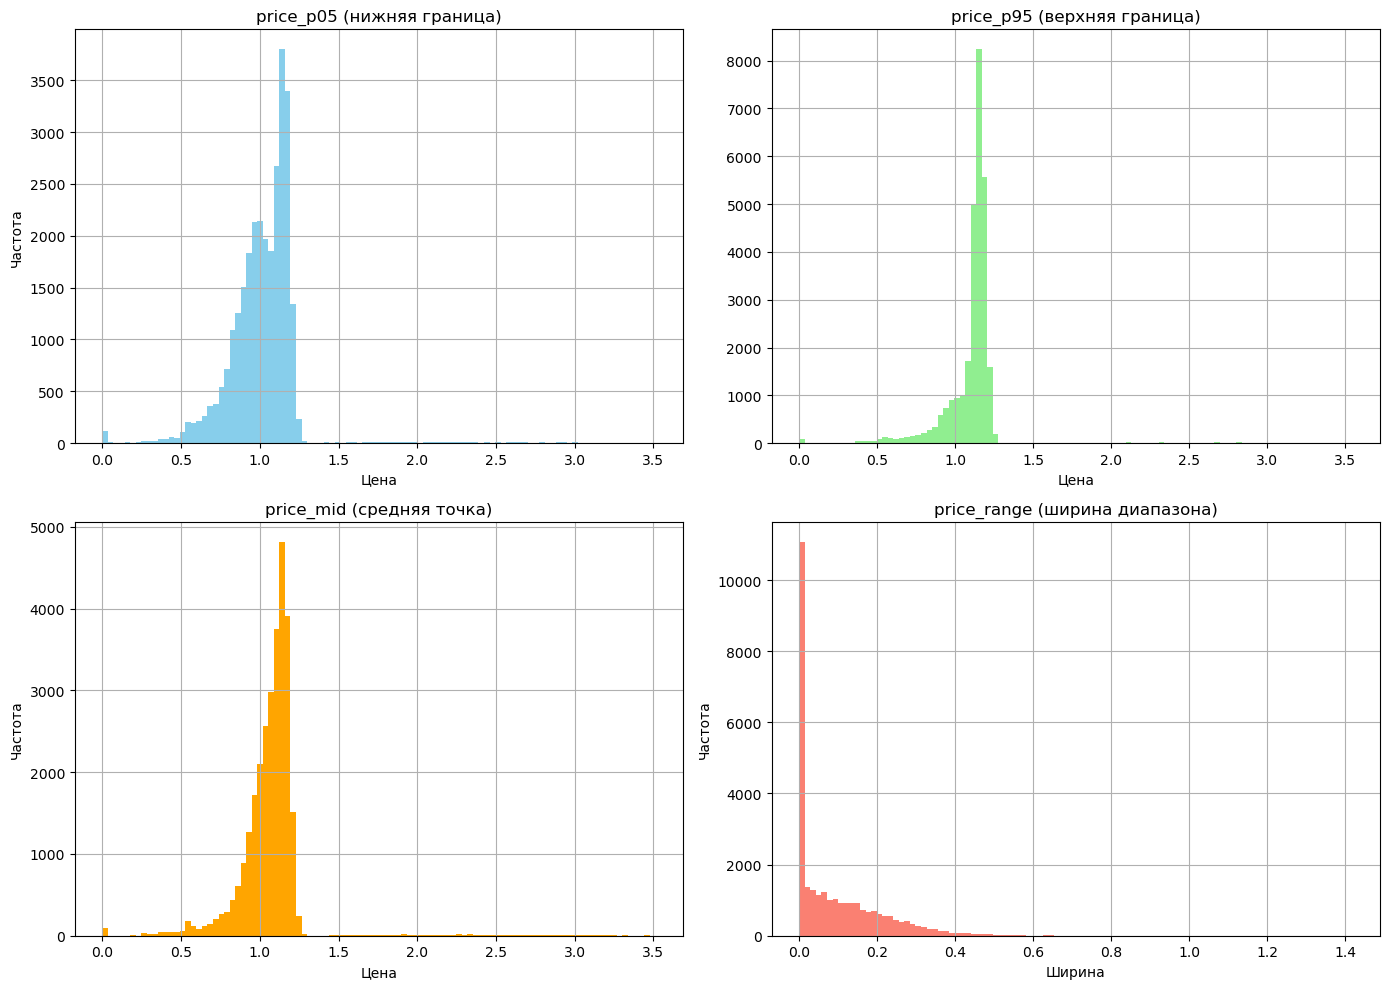

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Гистограммы
df_train['price_p05'].hist(bins=100, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('price_p05 (нижняя граница)')
axes[0,0].set_xlabel('Цена')
axes[0,0].set_ylabel('Частота')

df_train['price_p95'].hist(bins=100, ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('price_p95 (верхняя граница)')
axes[0,1].set_xlabel('Цена')

df_train['price_mid'].hist(bins=100, ax=axes[1,0], color='orange')
axes[1,0].set_title('price_mid (средняя точка)')
axes[1,0].set_xlabel('Цена')
axes[1,0].set_ylabel('Частота')

df_train['price_range'].hist(bins=100, ax=axes[1,1], color='salmon')
axes[1,1].set_title('price_range (ширина диапазона)')
axes[1,1].set_xlabel('Ширина')
axes[1,1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [53]:
neg_or_zero_p05 = (df_train['price_p05'] <= 0).sum()
neg_or_zero_p95 = (df_train['price_p95'] <= 0).sum()

print(f"Наблюдений с price_p05 ≤ 0: {neg_or_zero_p05}")
print(f"Наблюдений с price_p95 ≤ 0: {neg_or_zero_p95}")

Наблюдений с price_p05 ≤ 0: 104
Наблюдений с price_p95 ≤ 0: 0


In [54]:
zero_range = (df_train['price_range'] == 0).sum()
total = len(df_train)
zero_range_pct = zero_range / total * 100

print(f"Наблюдений с price_range == 0: {zero_range} ({zero_range_pct:.2f}%)")

Наблюдений с price_range == 0: 0 (0.00%)


In [55]:
# Удаляем все наблюдения, где нижняя граница цены некорректна
df_train = df_train[df_train['price_p05'] > 0].reset_index(drop=True)

In [56]:
# Средние границы и ширина в зависимости от флагов
print("=== По activity_flag ===")
print(df_train.groupby('activity_flag')[['price_p05', 'price_p95', 'price_range']].mean())

print("\n=== По holiday_flag ===")
print(df_train.groupby('holiday_flag')[['price_p05', 'price_p95', 'price_range']].mean())

=== По activity_flag ===
               price_p05  price_p95  price_range
activity_flag                                   
0               1.108225   1.156390     0.048165
1               0.957279   1.091618     0.134339

=== По holiday_flag ===
              price_p05  price_p95  price_range
holiday_flag                                   
0              1.025685   1.122937     0.097252
1              1.024201   1.116939     0.092738


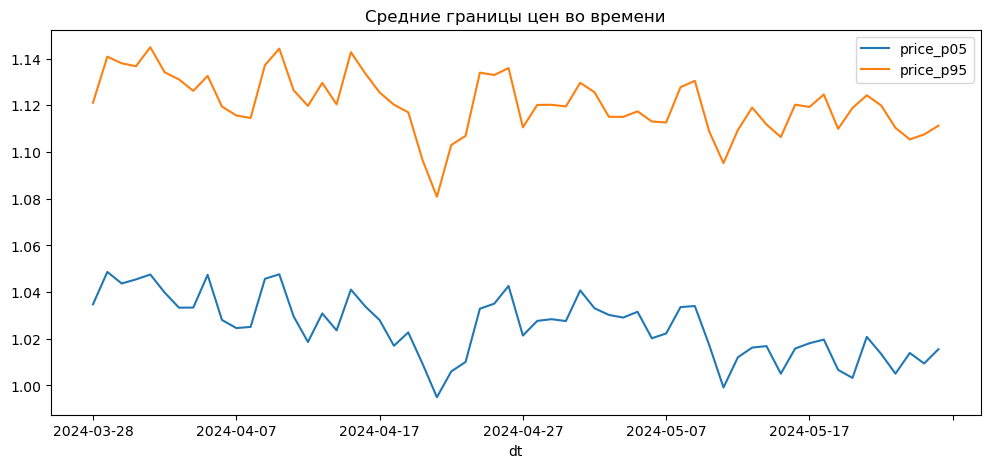

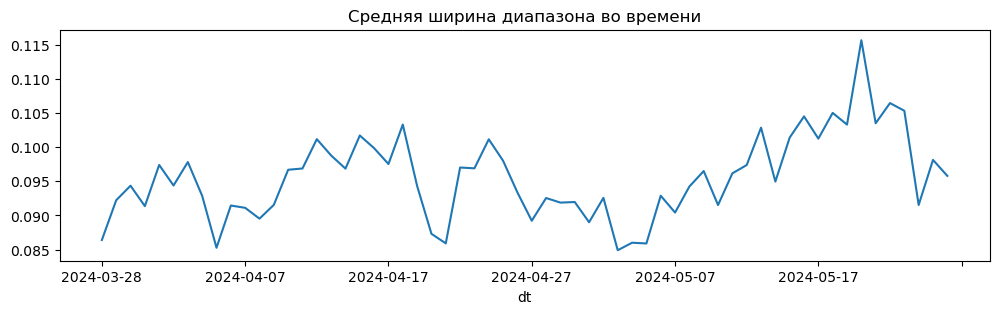

In [57]:
# Агрегируем по дате
daily = df_train.groupby('dt')[['price_p05', 'price_p95', 'price_range']].mean()

# Строим график
daily[['price_p05', 'price_p95']].plot(figsize=(12, 5), title='Средние границы цен во времени')
plt.show()

daily['price_range'].plot(figsize=(12, 3), title='Средняя ширина диапазона во времени')
plt.show()

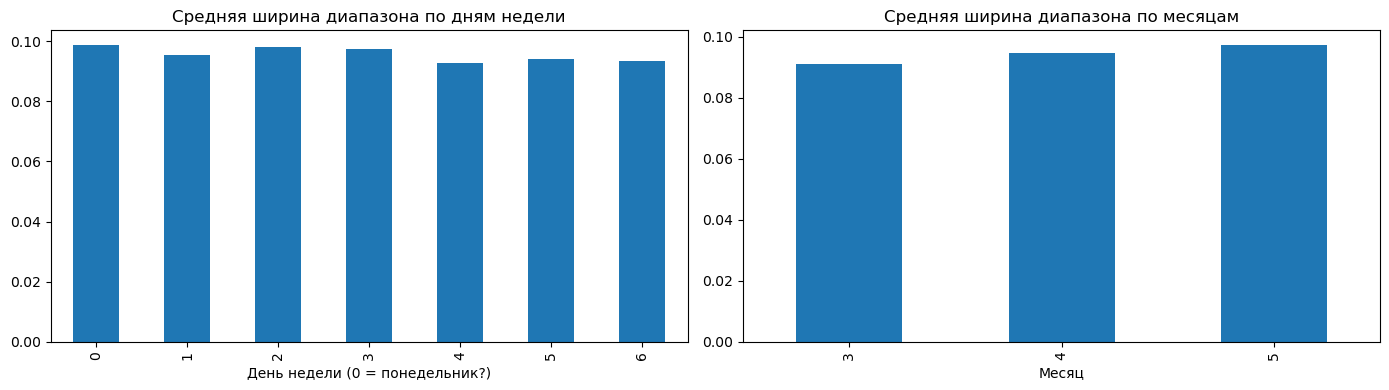

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# По дням недели
df_train.groupby('dow')['price_range'].mean().plot(kind='bar', ax=axes[0], title='Средняя ширина диапазона по дням недели')
axes[0].set_xlabel('День недели (0 = понедельник?)')

# По месяцам
df_train.groupby('month')['price_range'].mean().plot(kind='bar', ax=axes[1], title='Средняя ширина диапазона по месяцам')
axes[1].set_xlabel('Месяц')

plt.tight_layout()
plt.show()

Загружено 29100 строк и 19 столбцов.


/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Silhouette Score: 0.271


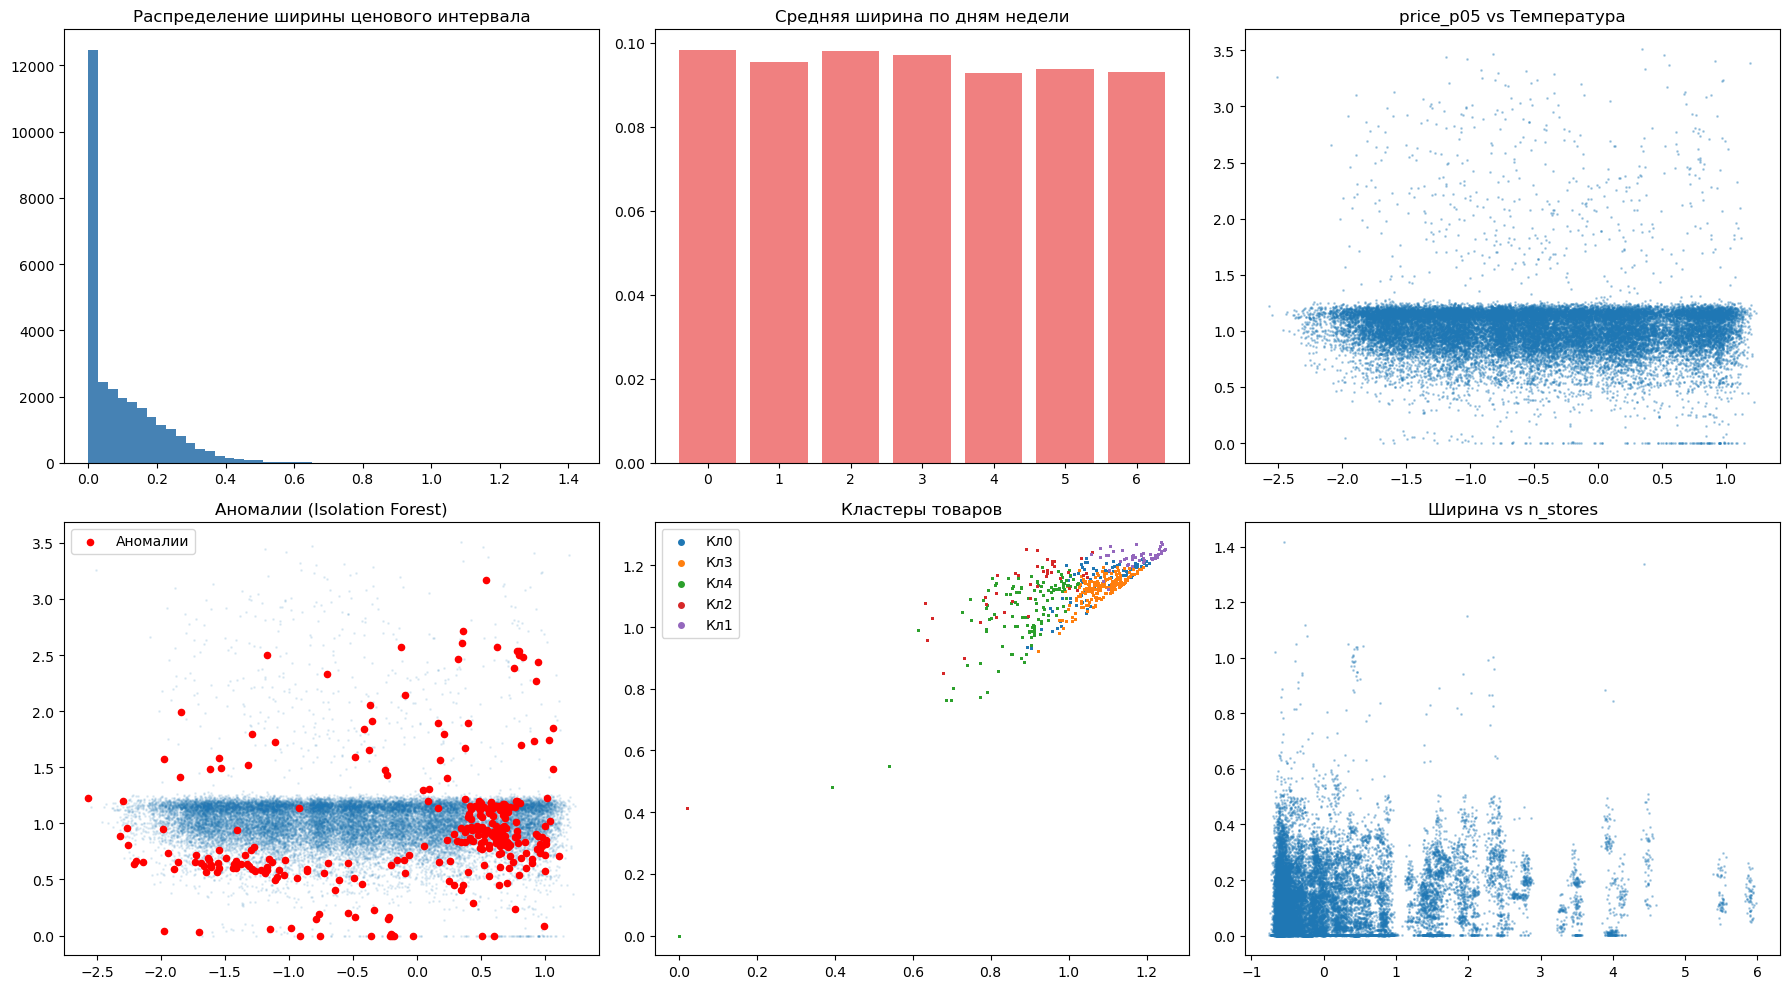


✅ Добавлено 33 новых признаков.
Итоговый набор: 52 столбцов.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Загрузка данных
df = pd.read_csv(FILE_PATH, parse_dates=['dt'])
print(f"Загружено {df.shape[0]} строк и {df.shape[1]} столбцов.")

# === 1. Проверка и создание целевой ширины ===
df = df[df['price_p05'] <= df['price_p95']].copy()
df['price_width'] = df['price_p95'] - df['price_p05']

# === 2. Циклические признаки (sin/cos) ===
cyclics = {'dow': 7, 'day_of_month': 31, 'week_of_year': 52, 'month': 12}
for feat, period in cyclics.items():
    df[f'{feat}_sin'] = np.sin(2 * np.pi * df[feat] / period)
    df[f'{feat}_cos'] = np.cos(2 * np.pi * df[feat] / period)

# === 3. Нелинейные и интерактивные признаки ===
df['stores_holiday'] = df['n_stores'] * df['holiday_flag']
df['stores_activity'] = df['n_stores'] * df['activity_flag']
df['temp_humidity'] = df['avg_temperature'] * df['avg_humidity']
df['temp_squared'] = df['avg_temperature'] ** 2
df['humidity_squared'] = df['avg_humidity'] ** 2
df['wind_squared'] = df['avg_wind_level'] ** 2
df['precpt_log'] = np.log1p(df['precpt'])

# === 4. Агрегации по товару (статистики на историю) ===
agg_funcs = ['mean', 'std', 'min', 'max']
price_cols = ['price_p05', 'price_p95', 'price_width']
product_stats = df.groupby('product_id')[price_cols].agg(agg_funcs)
product_stats.columns = [f'{col}_{func}' for col in price_cols for func in agg_funcs]
df = df.merge(product_stats, on='product_id', how='left')
df.fillna(0, inplace=True)

# === 5. Детекция аномалий ===
anomaly_cols = ['n_stores', 'precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level', 'price_width']
iso = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso.fit_predict(df[anomaly_cols])

# === 6. Кластеризация товаров ===
cluster_features = [f'price_{p}_{s}' for p in ['p05', 'p95', 'width'] for s in ['mean', 'std']]
X_cluster = StandardScaler().fit_transform(df[cluster_features])
df['cluster_id'] = KMeans(n_clusters=5, random_state=42).fit_predict(X_cluster)
print("Silhouette Score:", round(silhouette_score(X_cluster, df['cluster_id']), 3))

# === 7. PCA на погодных/контекстных признаках ===
weather_cols = ['n_stores', 'precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level',
                'temp_squared', 'humidity_squared', 'wind_squared', 'temp_humidity']
X_weather = df[weather_cols].fillna(df[weather_cols].median())
X_weather_scaled = StandardScaler().fit_transform(X_weather)
df[['weather_pca_1', 'weather_pca_2', 'weather_pca_3']] = PCA(n_components=3).fit_transform(X_weather_scaled)

# === 8. Визуализации ===
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# 1. Распределение ширины
axs[0,0].hist(df['price_width'], bins=50, color='steelblue')
axs[0,0].set_title('Распределение ширины ценового интервала')

# 2. Ширина по дням недели
dow_width = df.groupby('dow')['price_width'].mean()
axs[0,1].bar(dow_width.index, dow_width.values, color='lightcoral')
axs[0,1].set_title('Средняя ширина по дням недели')

# 3. Цена vs температура
axs[0,2].scatter(df['avg_temperature'], df['price_p05'], s=1, alpha=0.3)
axs[0,2].set_title('price_p05 vs Температура')

# 4. Аномалии
anom = df[df['anomaly'] == -1]
axs[1,0].scatter(df['avg_temperature'], df['price_p05'], s=1, alpha=0.1)
axs[1,0].scatter(anom['avg_temperature'], anom['price_p05'], s=20, c='red', label='Аномалии')
axs[1,0].legend()
axs[1,0].set_title('Аномалии (Isolation Forest)')

# 5. Кластеры
for cl in df['cluster_id'].unique():
    mask = df['cluster_id'] == cl
    axs[1,1].scatter(df.loc[mask, 'price_p05_mean'], df.loc[mask, 'price_p95_mean'], s=1, label=f'Кл{cl}')
axs[1,1].set_title('Кластеры товаров')
axs[1,1].legend(markerscale=4)

# 6. n_stores vs ширина
axs[1,2].scatter(df['n_stores'], df['price_width'], s=1, alpha=0.3)
axs[1,2].set_title('Ширина vs n_stores')

plt.tight_layout()
plt.show()

# === 9. Итог ===
initial_cols = pd.read_csv(FILE_PATH, nrows=1).shape[1]
print(f"\n✅ Добавлено {df.shape[1] - initial_cols} новых признаков.")
print(f"Итоговый набор: {df.shape[1]} столбцов.")
# df.to_csv('train_enriched.csv', index=False)  # раскомментируйте, чтобы сохранить

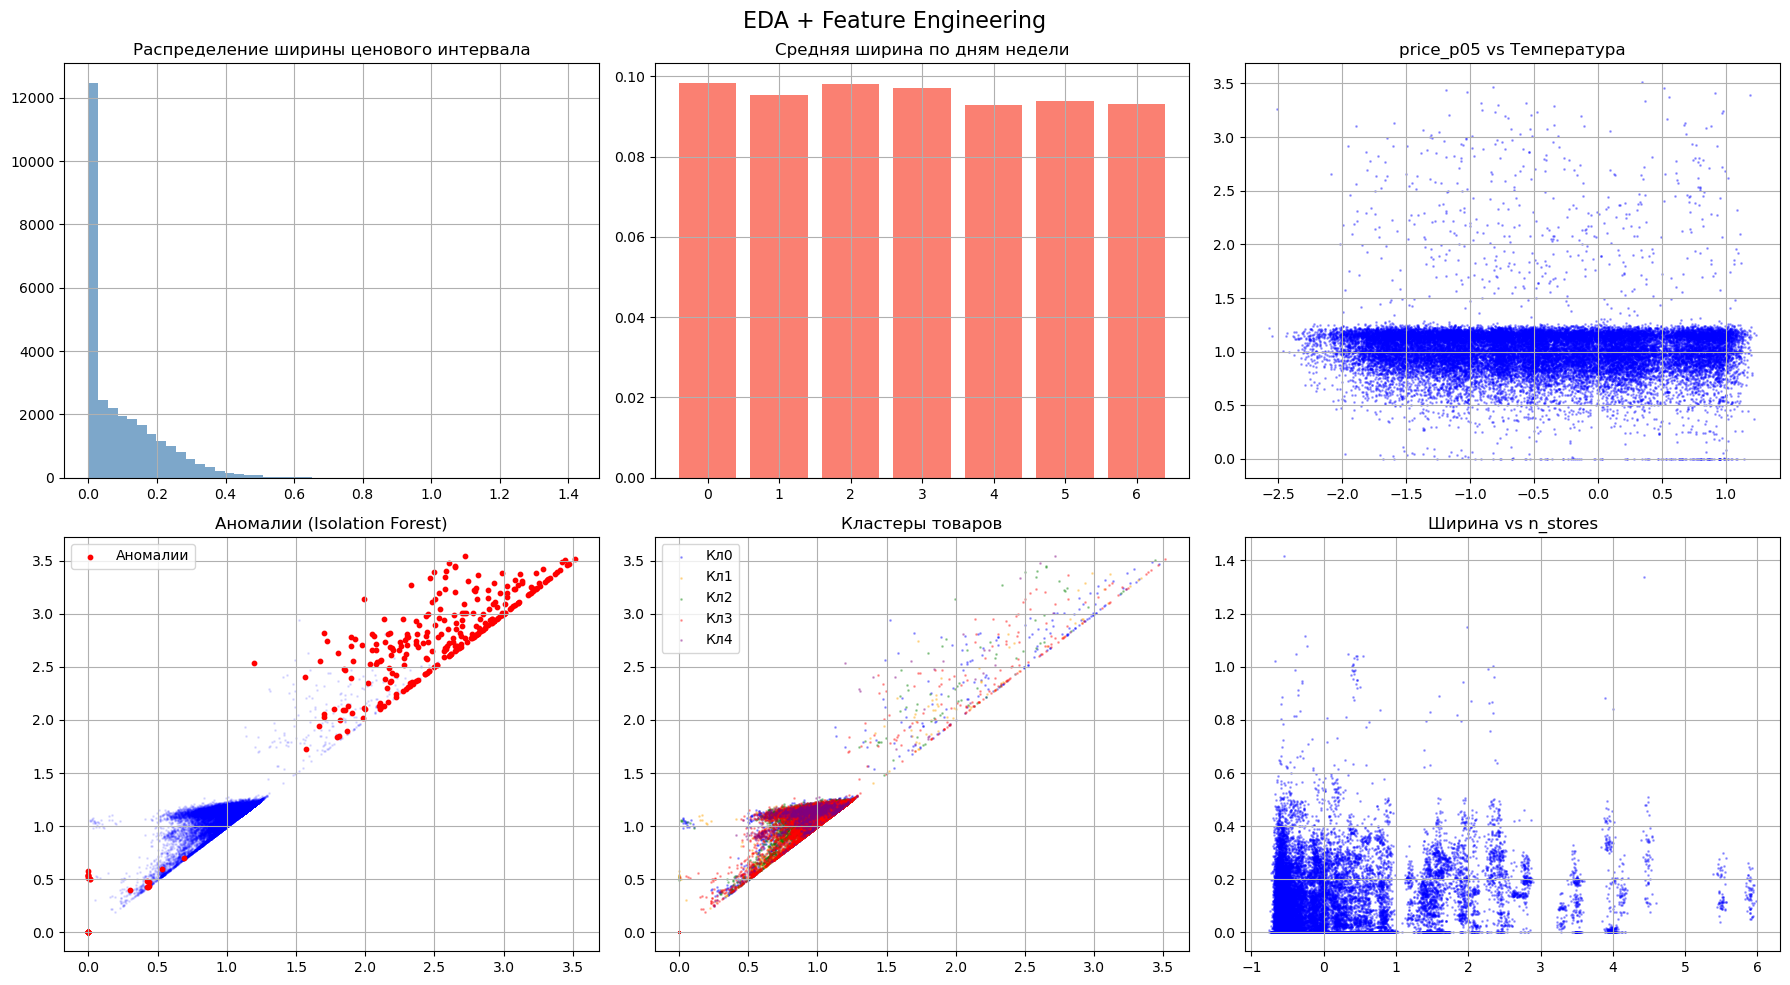


✅ Готово: добавлены:
- Логарифмическая ширина
- Полиномы и взаимодействия (температура², temp×humidity, dow×holiday)
- Метка аномалии (Isolation Forest)
- Кластер товара (KMeans)
- Взаимодействия с n_stores (log, inv, width_per_store)


In [60]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 1. Базовые фичи ---
df['width'] = df['price_p95'] - df['price_p05']
df['log_width'] = np.log(df['width'] + 1e-6)

# --- 2. Взаимодействия и полиномы ---
df['avg_temperature_sq'] = df['avg_temperature'] ** 2
df['avg_temperature_cub'] = df['avg_temperature'] ** 3
df['temp_humidity_interaction'] = df['avg_temperature'] * df['avg_humidity']
df['dow_holiday_interaction'] = df['dow'] * df['holiday_flag']
df['n_stores_log'] = np.log(df['n_stores'] + 1)
df['n_stores_inv'] = 1 / (df['n_stores'] + 1)
df['width_per_store'] = df['width'] / (df['n_stores'] + 1)

# --- 3. Аномалии ---
clf = IsolationForest(contamination=0.01, random_state=42)
df['is_anomaly'] = clf.fit_predict(df[['price_p05', 'price_p95', 'n_stores', 'avg_temperature', 'avg_humidity']])
df['is_anomaly'] = (df['is_anomaly'] == -1).astype(int)

# --- 4. Кластеризация ---
kmeans = KMeans(n_clusters=5, random_state=42)
df['product_cluster'] = kmeans.fit_predict(df[['price_p05', 'price_p95', 'n_stores', 'avg_temperature', 'avg_humidity']])

# --- 5. Визуализация всех анализа в одной ячейке ---

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("EDA + Feature Engineering", fontsize=16)

# График 1: Распределение ширины
axes[0,0].hist(df['width'], bins=50, color='steelblue', alpha=0.7)
axes[0,0].set_title('Распределение ширины ценового интервала')
axes[0,0].grid(True)

# График 2: Средняя ширина по дням недели
mean_width_by_dow = df.groupby('dow')['width'].mean()
axes[0,1].bar(mean_width_by_dow.index, mean_width_by_dow.values, color='salmon')
axes[0,1].set_title('Средняя ширина по дням недели')
axes[0,1].grid(True)

# График 3: price_p05 vs Температура
axes[0,2].scatter(df['avg_temperature'], df['price_p05'], s=1, alpha=0.3, color='blue')
axes[0,2].set_title('price_p05 vs Температура')
axes[0,2].grid(True)

# График 4: Аномалии
anom = df[df['is_anomaly'] == 1]
axes[1,0].scatter(df['price_p05'], df['price_p95'], s=1, alpha=0.1, color='blue')
axes[1,0].scatter(anom['price_p05'], anom['price_p95'], s=10, color='red', label='Аномалии')
axes[1,0].set_title('Аномалии (Isolation Forest)')
axes[1,0].legend()
axes[1,0].grid(True)

# График 5: Кластеры
colors = ['blue', 'orange', 'green', 'red', 'purple']
for i in range(5):
    cluster_data = df[df['product_cluster'] == i]
    axes[1,1].scatter(cluster_data['price_p05'], cluster_data['price_p95'], s=1, alpha=0.3, color=colors[i], label=f'Кл{i}')
axes[1,1].set_title('Кластеры товаров')
axes[1,1].legend()
axes[1,1].grid(True)

# График 6: Ширина vs n_stores
axes[1,2].scatter(df['n_stores'], df['width'], s=1, alpha=0.3, color='blue')
axes[1,2].set_title('Ширина vs n_stores')
axes[1,2].grid(True)

plt.tight_layout()
plt.show()

print("\n✅ Готово: добавлены:")
print("- Логарифмическая ширина")
print("- Полиномы и взаимодействия (температура², temp×humidity, dow×holiday)")
print("- Метка аномалии (Isolation Forest)")
print("- Кластер товара (KMeans)")
print("- Взаимодействия с n_stores (log, inv, width_per_store)")

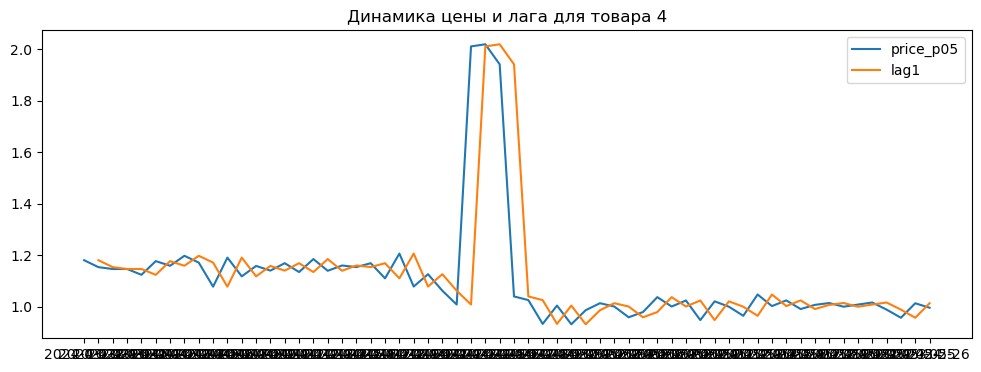

In [65]:
# Для случайного товара
sample_product = df_train['product_id'].iloc[100]
sample_data = df_train[df_train['product_id'] == sample_product].copy()
sample_data['price_p05_lag1'] = sample_data['price_p05'].shift(1)

plt.figure(figsize=(12, 4))
plt.plot(sample_data['dt'], sample_data['price_p05'], label='price_p05')
plt.plot(sample_data['dt'], sample_data['price_p05_lag1'], label='lag1')
plt.legend()
plt.title(f'Динамика цены и лага для товара {sample_product}')
plt.show()

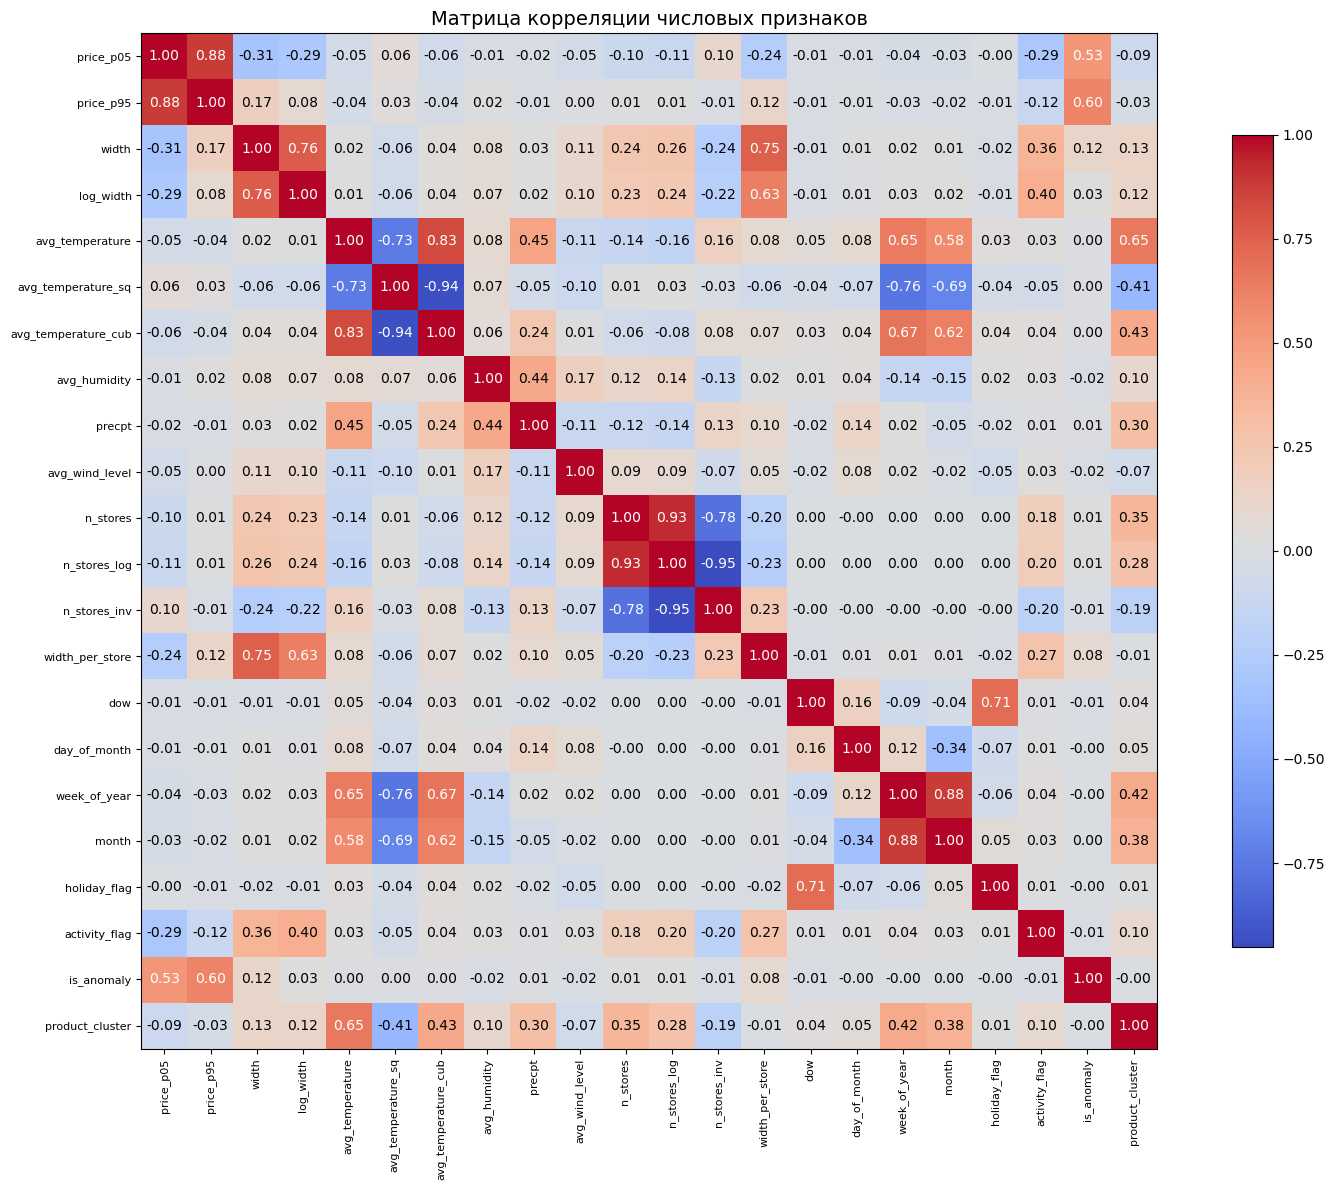


🔍 Анализ мультиколлинеарности (VIF):
                feature           VIF
15                month  14735.851991
14         week_of_year  13320.206819
13         day_of_month   3344.712988
12                  dow    178.639697
9          n_stores_log    129.998659
10         n_stores_inv     46.848637
8              n_stores     30.717931
4   avg_temperature_cub     21.886113
3    avg_temperature_sq     16.705346
2       avg_temperature     10.250448
0                 width      4.906524
11      width_per_store      4.366798
19      product_cluster      3.197760
1             log_width      2.661137
6                precpt      2.240280

🏆 Топ-10 признаков по важности (для price_p05):
               feature  importance
0                width         497
11     width_per_store         415
8             n_stores         412
5         avg_humidity         265
7       avg_wind_level         228
6               precpt         201
2      avg_temperature         198
3   avg_temperature_sq   

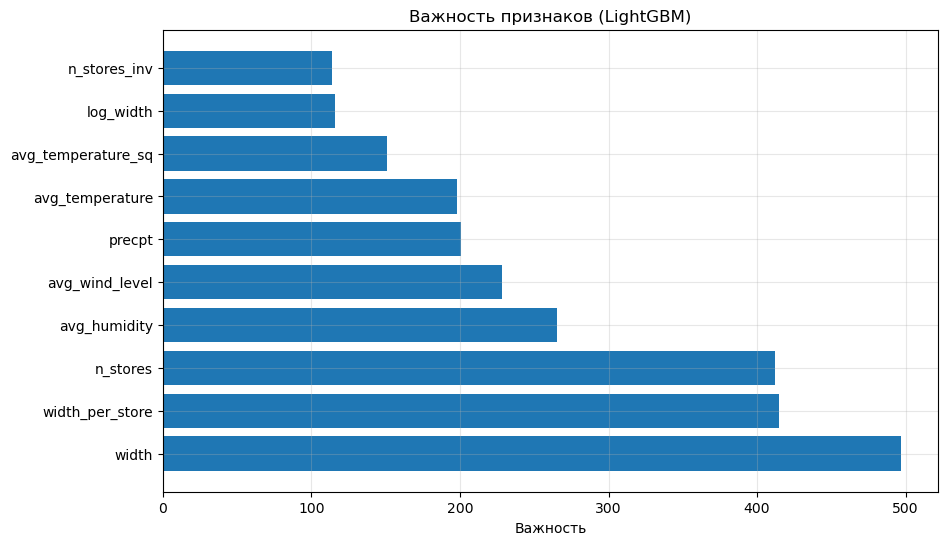

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


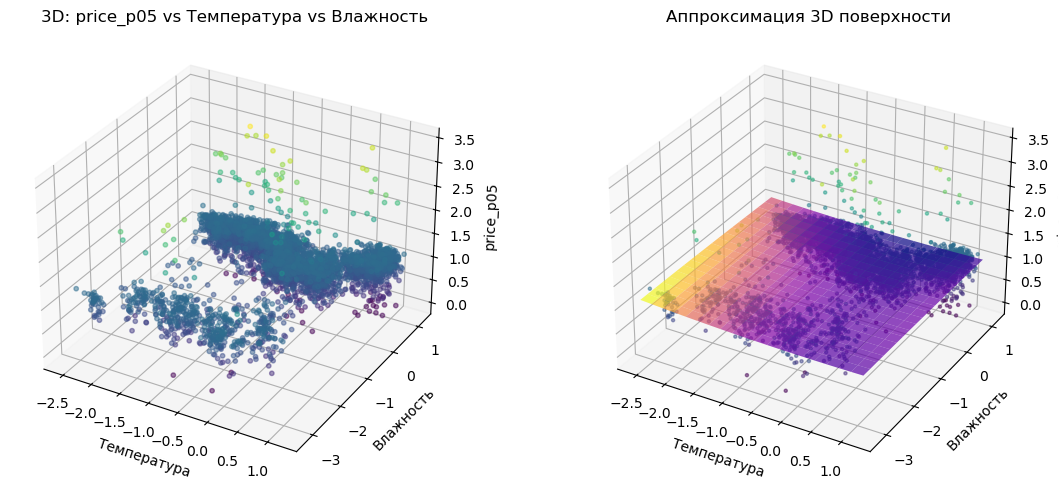

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # если не работает — заменим на matplotlib
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- Убедимся, что у нас есть все фичи из предыдущего шага ---
# Если нет — запустите предыдущую ячейку или воспроизведите её логику

# --- Создадим список числовых признаков для корреляции ---
numeric_cols = [
    'price_p05', 'price_p95', 'width', 'log_width',
    'avg_temperature', 'avg_temperature_sq', 'avg_temperature_cub',
    'avg_humidity', 'precpt', 'avg_wind_level',
    'n_stores', 'n_stores_log', 'n_stores_inv', 'width_per_store',
    'dow', 'day_of_month', 'week_of_year', 'month',
    'holiday_flag', 'activity_flag',
    'is_anomaly', 'product_cluster'
]

# Убираем NaN и дубликаты
df_corr = df[numeric_cols].dropna().copy()

# --- Матрица корреляции ---
plt.figure(figsize=(16, 12))
corr_matrix = df_corr.corr()

# Построим тепловую карту с помощью matplotlib (без seaborn)
cax = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Матрица корреляции числовых признаков', fontsize=14)

# Подписи осей
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90, fontsize=8)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=8)

# Цветовая шкала
plt.colorbar(cax, shrink=0.8)

# Нанесём значения корреляции поверх ячеек
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if abs(corr_matrix.iloc[i, j]) > 0.5 else "black")

plt.tight_layout()
plt.show()

# --- Анализ мультиколлинеарности: VIF (Variance Inflation Factor) ---
print("\n🔍 Анализ мультиколлинеарности (VIF):")

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Выберем только непрерывные/числовые признаки без целевых переменных
X_vif = df_corr.drop(columns=['price_p05', 'price_p95'])

# Стандартизируем для VIF
scaler = StandardScaler()
X_vif_scaled = scaler.fit_transform(X_vif)

# Рассчитываем VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_scaled, i) for i in range(len(X_vif.columns))]

print(vif_data.sort_values(by="VIF", ascending=False).head(15))

# --- Визуализация важности признаков через LightGBM (если обучали) ---
# Если ещё не обучали — создадим быструю модель для оценки важности

try:
    from lightgbm import LGBMRegressor
    
    # Быстрая модель для оценки важности
    model = LGBMRegressor(n_estimators=100, random_state=42, verbose=-1)
    
    # Обучаем на price_p05
    X_train = df_corr.drop(columns=['price_p05', 'price_p95'])
    y_train = df_corr['price_p05']
    
    model.fit(X_train, y_train)
    
    # Важность признаков
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    print(f"\n🏆 Топ-10 признаков по важности (для price_p05):")
    print(feature_importance.head(10))
    
    # График важности
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'])
    plt.title('Важность признаков (LightGBM)')
    plt.xlabel('Важность')
    plt.grid(True, alpha=0.3)
    plt.show()
    
except ImportError:
    print("\n⚠️ LightGBM не установлен — пропускаем оценку важности.")

# --- Взаимодействие 3D: price_p05 vs temperature vs humidity ---
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 5))

# 3D scatter plot
ax1 = fig.add_subplot(121, projection='3d')
sample = df.sample(5000, random_state=42)  # берем подвыборку для скорости
ax1.scatter(sample['avg_temperature'], sample['avg_humidity'], sample['price_p05'],
            c=sample['price_p05'], cmap='viridis', s=10, alpha=0.5)
ax1.set_xlabel('Температура')
ax1.set_ylabel('Влажность')
ax1.set_zlabel('price_p05')
ax1.set_title('3D: price_p05 vs Температура vs Влажность')

# 3D surface (аппроксимация)
ax2 = fig.add_subplot(122, projection='3d')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(sample[['avg_temperature', 'avg_humidity']])
model_3d = LinearRegression().fit(X_poly, sample['price_p05'])

# Создаем сетку для поверхности
temp_range = np.linspace(sample['avg_temperature'].min(), sample['avg_temperature'].max(), 20)
humid_range = np.linspace(sample['avg_humidity'].min(), sample['avg_humidity'].max(), 20)
T, H = np.meshgrid(temp_range, humid_range)
X_grid = poly.transform(np.vstack([T.ravel(), H.ravel()]).T)
Z = model_3d.predict(X_grid).reshape(T.shape)

ax2.plot_surface(T, H, Z, cmap='plasma', alpha=0.7)
ax2.scatter(sample['avg_temperature'], sample['avg_humidity'], sample['price_p05'],
            c=sample['price_p05'], cmap='viridis', s=5, alpha=0.5)
ax2.set_xlabel('Температура')
ax2.set_ylabel('Влажность')
ax2.set_zlabel('price_p05')
ax2.set_title('Аппроксимация 3D поверхности')

plt.tight_layout()
plt.show()

In [62]:
import numpy as np
import pandas as pd
from itertools import combinations

# 1. Базовые признаки
df['width'] = df['price_p95'] - df['price_p05']
df['log_width'] = np.log(df['width'] + 1e-6)

# 2. Погодные флаги
df['is_cold'] = (df['avg_temperature'] < -1).astype(int)
df['is_hot'] = (df['avg_temperature'] > 1).astype(int)
df['is_rainy'] = (df['precpt'] > 0.5).astype(int)
df['is_dry'] = (df['avg_humidity'] < 0.3).astype(int)
df['is_windy'] = (df['avg_wind_level'] > 0.7).astype(int)

# 3. Полиномы
df['temp_sq'] = df['avg_temperature'] ** 2
df['temp_cub'] = df['avg_temperature'] ** 3
df['humidity_sq'] = df['avg_humidity'] ** 2

# 4. Взаимодействия: погода × контекст
df['cold_holiday'] = df['is_cold'] * df['holiday_flag']
df['hot_activity'] = df['is_hot'] * df['activity_flag']
df['rainy_holiday'] = df['is_rainy'] * df['holiday_flag']
df['windy_activity'] = df['is_windy'] * df['activity_flag']

# 5. Взаимодействия: n_stores × контекст
df['stores_holiday'] = df['n_stores'] * df['holiday_flag']
df['stores_activity'] = df['n_stores'] * df['activity_flag']
df['log_stores_dow'] = df.get('n_stores_log', np.log(df['n_stores'] + 1)) * df['dow']

# 6. ИЕРАРХИЧЕСКИЕ АГРЕГАТЫ — ИСПРАВЛЕНО ✅
hierarchy_levels = ['management_group_id', 'first_category_id', 'second_category_id', 'third_category_id']
for level in hierarchy_levels:
    if level in df.columns:
        for q_label in ['05', '95']:
            col_name = f'price_p{q_label}'
            if col_name in df.columns:
                df[f'{level}_price_{q_label}_mean'] = df.groupby(level)[col_name].transform('mean')
                df[f'{level}_price_{q_label}_std'] = df.groupby(level)[col_name].transform('std')
        # Агрегация по популярности
        df[f'{level}_n_stores_mean'] = df.groupby(level)['n_stores'].transform('mean')

# 7. Автоматические парные взаимодействия между топ-числовыми признаками
top_numerical = [
    'width', 'n_stores', 'avg_temperature', 'avg_humidity',
    'precpt', 'avg_wind_level', 'log_width'
]
# Убедимся, что все есть в df
top_numerical = [col for col in top_numerical if col in df.columns]

for col1, col2 in combinations(top_numerical, 2):
    df[f'{col1}_x_{col2}'] = df[col1] * df[col2]

# 8. Циклическое кодирование дня недели
df['dow_sin'] = np.sin(2 * np.pi * df['dow'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['dow'] / 7)

# 9. Композитные признаки
df['temp_humidity_prod'] = df['avg_temperature'] * df['avg_humidity']
df['temp_precpt_interaction'] = df['avg_temperature'] * df['precpt']
df['humidity_wind_interaction'] = df['avg_humidity'] * df['avg_wind_level']

# 10. УДАЛЕНИЕ мультиколлинеарных и избыточных признаков
cols_to_drop = ['month', 'week_of_year', 'day_of_month']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 11. Финальный список признаков (без целевых и ID)
cols_to_exclude = {
    'product_id', 'dt', 'price_p05', 'price_p95',
    'month', 'week_of_year', 'day_of_month'
}
feature_cols = [col for col in df.columns if col not in cols_to_exclude]

print(f"✅ Готово! Всего признаков: {len(feature_cols)}")
print("Примеры новых взаимодействий:")
sample_interactions = [col for col in feature_cols if any(x in col for x in ['_x_', 'cold_', 'hot_', 'rainy_', 'price_05_mean'])]
print(sample_interactions[:10])

✅ Готово! Всего признаков: 113
Примеры новых взаимодействий:
['cold_holiday', 'hot_activity', 'rainy_holiday', 'management_group_id_price_05_mean', 'first_category_id_price_05_mean', 'second_category_id_price_05_mean', 'third_category_id_price_05_mean', 'width_x_n_stores', 'width_x_avg_temperature', 'width_x_avg_humidity']


In [63]:
# Уникальные товары в трейне и тесте
train_products = set(df_train['product_id'])
test_products = set(df_test['product_id'])

# Пересечение (общие товары)
common_products = train_products & test_products

# Только в трейне
only_train = train_products - test_products

# Только в тесте (новые товары)
only_test = test_products - train_products

# Вывод статистики
print(f"Всего товаров в трейне: {len(train_products)}")
print(f"Всего товаров в тесте:  {len(test_products)}")
print(f"Общие товары:           {len(common_products)} ({len(common_products) / len(test_products) * 100:.2f}%)")
print(f"Новые товары в тесте:   {len(only_test)} ({len(only_test) / len(test_products) * 100:.2f}%)")

Всего товаров в трейне: 484
Всего товаров в тесте:  635
Общие товары:           484 (76.22%)
Новые товары в тесте:   151 (23.78%)


76.22% товаров в тесте — уже есть в трейне → для них есть полная история цен, лаги, тренды. \
→ Модель может строить точные прогнозы на основе прошлого поведения. \
23.78% товаров — абсолютно новые (151 из 635) → для них нет ни одного наблюдения в трейне.

Можно попробовать добавить product_age_days \
→ Поможет модели различать: «если это новый товар → не верь лагам, смотри на категорию и контекст»

In [72]:
df_train['is_new_product'] = df_train['product_id'].isin(only_test)

print("n_stores для старых товаров:")
print(df_train[~df_train['is_new_product']]['n_stores'].describe())
print("\nn_stores для новых товаров в тесте:")
print(df_test[df_test['product_id'].isin(only_test)]['n_stores'].describe())


n_stores для старых товаров:
count    28996.000000
mean        -0.002365
std          0.991518
min         -0.749200
25%         -0.582789
50%         -0.443400
75%          0.132535
max          5.975207
Name: n_stores, dtype: float64

n_stores для новых товаров в тесте:
count    13530.000000
mean         0.157785
std          1.035294
min         -0.700023
25%         -0.425664
50%         -0.258483
75%          0.309996
max          5.858757
Name: n_stores, dtype: float64


пробовала \
Медиану + ширину вместо границ — провал ; \
CatBoost для новых товаров — не дал прироста; \
Сложные погодные признаки (feels_like, good_shopping_weather) — не помогли, убрала их; \
PCA на лагах — только ухудшил.


Что помогло \
Лаги (price_p05_lag1) и скользящие средние (price_p05_7d) \
Циклические признаки (dow_sin, month_cos) — корректно обрабатывают сезонность \
Признаки редкости и аномалий — добавляют устойчивость модели 
